In [2]:
cd /mnt/sda/otani/Experiments/moment_retrieval

/mnt/sda/otani/Experiments/moment_retrieval


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from src.toolbox.eval import _tiou

# Evaluate human performance using multi-references

Given 5 annotations, pick out 1 out of 5 and compare the annotation to other ones.
For now, employ evaluate by comparing to nearest neighbor manner.

In [24]:
from scipy.spatial.distance import pdist, squareform
pair_iou = lambda u, v: _tiou(u[None, :], v)

def compute_iou_2_nn(x):
    st_perc = x["Answer.start"]
    ed_perc = x["Answer.end"]
    pred = np.vstack([st_perc, ed_perc]).T
    ious = squareform(pdist(pred, pair_iou))
    ious = ious[~np.eye(ious.shape[0],dtype=bool)].reshape(len(ious), -1)
    max_ious = ious.max(axis=1)
    return max_ious

Text(0.5, 1.0, 'Worst human R@1(IoU>0.5)0.41')

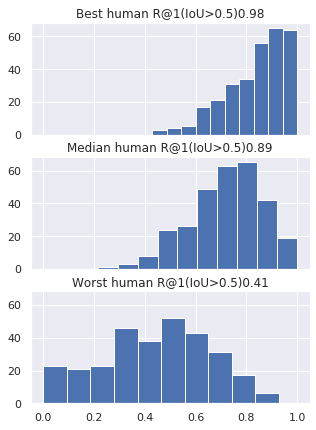

In [55]:
charade_data = pd.read_csv("data/raw/AMT/charade-sta/Batch_3991545_batch_results.csv")
iou_2_nns = charade_data.groupby("HITId").apply(iou2NN).values
iou_2_nns = np.vstack(iou_2_nns)

f, axes = plt.subplots(3, 1, sharey=True, sharex=True, figsize=(5, 7))

best_humans_ious = iou_2_nns.max(axis=1)
axes[0].hist(best_humans_ious)
axes[0].set_title(f'Best human R@1(IoU>0.5){(best_humans_ious>.5).mean():.2f}')

median_human_ious = np.median(iou_2_nns, axis=1)
axes[1].hist(median_human_ious)
axes[1].set_title(f'Median human R@1(IoU>0.5){(median_human_ious>.5).mean():.2f}')

worst_humans_ious = iou_2_nns.min(axis=1)
axes[2].hist(worst_humans_ious)
axes[2].set_title(f'Worst human R@1(IoU>0.5){(worst_humans_ious>.5).mean():.2f}')

data/raw/AMT/activitynet/Batch_3997812_batch_results.csv
data/raw/AMT/activitynet/Batch_3996080_batch_results.csv
data/raw/AMT/activitynet/Batch_3996408_batch_results.csv
data/raw/AMT/activitynet/Batch_4001034_batch_results.csv


Text(0.5, 1.0, 'Worst human R@1(IoU>0.5)0.26')

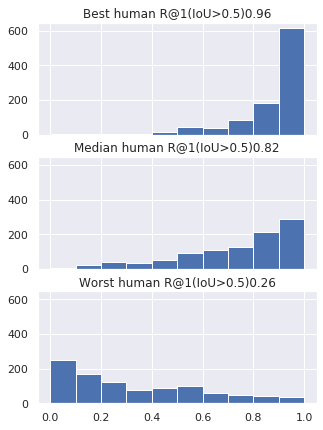

In [56]:
datas = []
data_root = "data/raw/AMT/activitynet/"
for file in os.listdir(data_root):
    if file.split(".")[-1] != "csv":
        continue
    print(data_root+file)
    data = pd.read_csv(data_root+file)
    if "Answer.error_report" in data.columns:
        invalid_hits = data[data["Answer.error_report"] == "video disabled"]["HITId"].unique()
        data = data[~data["HITId"].isin(invalid_hits)]
    datas.append(data[['HITId', 'WorkerId', 'Input.video_id', 'Input.start_sec', 'Input.end_sec', 'Input.length', 'Input.description', 'Answer.end', 'Answer.start']])
activitynet_data = pd.concat(datas)

iou_2_nns = activitynet_data.groupby("HITId").apply(iou2NN).values
iou_2_nns = np.vstack(iou_2_nns)

f, axes = plt.subplots(3, 1, sharey=True, sharex=True, figsize=(5, 7))

best_humans_ious = iou_2_nns.max(axis=1)
axes[0].hist(best_humans_ious)
axes[0].set_title(f'Best human R@1(IoU>0.5){(best_humans_ious>.5).mean():.2f}')

median_human_ious = np.median(iou_2_nns, axis=1)
axes[1].hist(median_human_ious)
axes[1].set_title(f'Median human R@1(IoU>0.5){(median_human_ious>.5).mean():.2f}')

worst_humans_ious = iou_2_nns.min(axis=1)
axes[2].hist(worst_humans_ious)
axes[2].set_title(f'Worst human R@1(IoU>0.5){(worst_humans_ious>.5).mean():.2f}')